- 이 데이터는 컬럼이 매무 많아 베이스라인에서 수치형 데이터만 사용했어요
- object컬럼 사용은 여러분의 몫입니다. 응원합니다.

In [1]:
import pandas as pd
train = pd.read_csv("/kaggle/input/big-data-analytics-certification-kr-2024-3/train.csv")
test = pd.read_csv("/kaggle/input/big-data-analytics-certification-kr-2024-3/test.csv")

In [2]:
# print(train.info) SalePrice
# print(test.info)
# test.head()
# print(train.shape, test.shape) # (1168, 81) (292, 80)

x = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

# print(x.shape, y.shape) # (1168, 80)

# print(x.isnull().sum()) # LotFrontage
# print(y.isnull().sum())

# train/test 데이터셋 합치기
x_full = pd.concat([x, test], axis = 0)
# print(x_full.shape) # (1460, 80)
x_full = x_full.drop(['Id'], axis = 1)
# print(x_full.shape) # (1460, 79)
# 결측치 처리
x_full = x_full.fillna(0)

# 원핫인코딩
# import sklearn.ensemble
# import sklearn.model_selection
# import sklearn.preprocessing
# import sklearn
# print(sklearn.__all__)
# import sklearn.metrics
# print(sklearn.metrics.__all__)

# print(dir(pd)) # get_dummies
# print(help(pd.get_dummies))
x_full = pd.get_dummies(x_full)
# print(x_full.shape) # (1460, 79)
# print(x_full.info)

# 3. x_full train+test 합친걸 다시 데이터 분리
# print(sklearn.model_selection.__all__)
x_train = x_full[:1168]
x_test = x_full[1168:]

from sklearn.model_selection import train_test_split
# print(help(train_test_split))
# X_train, X_test, y_train, y_test = train_test_split(
#     ...     X, y, test_size=0.33, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y, test_size = 0.2, random_state=42)
# print(x_train.shape, x_val.shape, y_train.shape, y_val.shape) # (934, 80) (234, 80) (934,) (234,)

# 4. 모델 학습 및 검증
# print(sklearn.ensemble.__all__)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# print(help(RandomForestRegressor))
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)

# 5. 평가
from sklearn.metrics import mean_squared_error, r2_score
# print(sklearn.metrics.__all__)
rmse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(rmse, r2)

# 6. 결과 데이터 저장
y_pred = model.predict(x_test)
# print(help(pd.DataFrame))
result = pd.DataFrame(y_pred, columns = ['pred']).to_csv('result.csv', index = False)

# 7. 결과 확인
result = pd.read_csv('result.csv')
print(result)

670831743.3836534 0.8658236019146273
          pred
0    324524.67
1    286674.49
2    146853.00
3    160717.30
4    116292.79
..         ...
287  206749.30
288  177525.26
289  173481.70
290  129301.75
291  170451.00

[292 rows x 1 columns]


# Simple EDA

In [3]:
print(train.shape, test.shape)
pd.set_option("display.max_columns", 100)
display(train.head(3))
display(test.head(3))

(1168, 81) (292, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151.0,TA,TA,CBlock,TA,TA,No,ALQ,902,Unf,0,196,1098,GasA,TA,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,260,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,6,1987,1987,Gable,CompShg,HdBoard,HdBoard,BrkFace,72.0,TA,TA,CBlock,Gd,Gd,No,GLQ,980,LwQ,40,92,1112,GasA,Gd,Y,SBrkr,1137,0,0,1137,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,Unf,2,551,TA,TA,Y,125,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,290.0,Gd,TA,PConc,Gd,TA,No,GLQ,565,Unf,0,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0,2520,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1995.0,RFn,3,721,TA,TA,Y,224,114,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal


<Axes: >

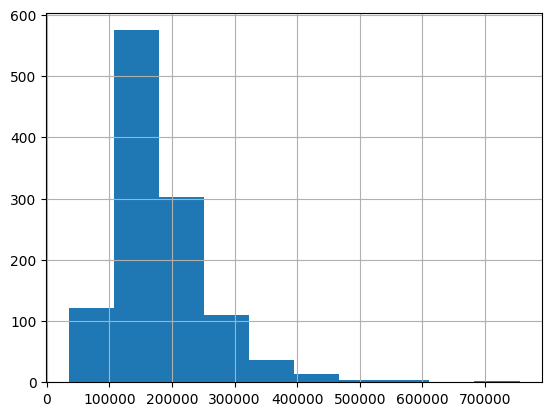

In [4]:
train['SalePrice'].hist()

In [5]:
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageYrBlt       69
GarageCond        69
GarageType        69
GarageFinish      69
GarageQual        69
BsmtFinType2      24
BsmtExposure      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [6]:
test.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          291
MiscFeature     286
Alley           271
Fence           238
MasVnrType      178
FireplaceQu     145
LotFrontage      41
BsmtFinType1     14
BsmtQual         14
BsmtCond         14
BsmtFinType2     14
BsmtExposure     14
GarageType       12
GarageYrBlt      12
GarageQual       12
GarageCond       12
GarageFinish     12
KitchenQual       0
Functional        0
BedroomAbvGr      0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Preprocessing

In [8]:
train = train.select_dtypes(exclude=['object'])
test = test.select_dtypes(exclude=['object'])
target = train.pop('SalePrice')
test_id = test['Id']

In [9]:
# Imputer 활용한 결측치 채우기
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
train = imp.fit_transform(train)
test = imp.transform(test)

In [10]:
# imputer는 numpy 형태로 반환함
print(type(train))

<class 'numpy.ndarray'>


In [11]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((992, 37), (176, 37), (992,), (176,))

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(y, y_pred):
    return mean_squared_error(y, y_pred) ** 0.5

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)

print("R2 : " + str(r2_score(y_val, pred)))
print("RMSE : " + str(rmse(y_val, pred)))

R2 : 0.8802886511228044
RMSE : 34012.40656863955


In [14]:
pred = model.predict(test)

In [15]:
submission = pd.DataFrame(data={
    'Id': test_id,
    'SalePrice' : pred
})
result = submission.to_csv("submission.csv", index=False)

In [16]:
print(result)

None
